# EXPLORATORY DATA ANALYSIS 

                                                                                                        MLB1-MINOR-APRIL. 

## Importing the required libraries for EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Approach to the dataset

In [2]:
p1=pd.read_csv(r"f:\ML\StudentsPerformance (1).csv")

In [3]:
p1.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
p1.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
p1.shape

(1000, 8)

In [6]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
p1.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


## Analysing variables

### There are two types of variables:

NUMERICAL VARIABLES:Math score,Reading code,Writing score.

CATEGORICAL VARIABLES:Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course

## Data imputation

### Cleaning Redundant Variables

In [8]:
p1.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In the given data set there are no redundant variables.

### Dropping irrelevant columns:    

In the given Dataset every column is to be used for analysis so we are not dropping any columms

### Cleaning columns with more NULL values

In [9]:
p1.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In the given data set there are no columns with null values

### Dropping the dulpicate rows

In [10]:
p1.duplicated().sum()

0

There are zero duplicate rows

### Detecting anomalies

In [11]:
p1[((p1['math score']>100)|(p1['reading score']>100)|(p1['writing score']>100)|(p1['writing score']<0)|(p1['math score']<0)|(p1['reading score']<0))]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


There are no anomalies

### Detecting Outliers

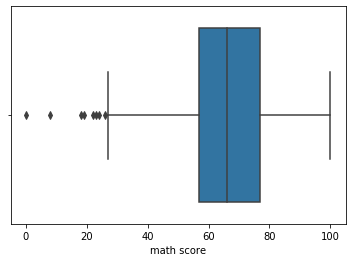

In [12]:
sns.boxplot(x=p1['math score'])

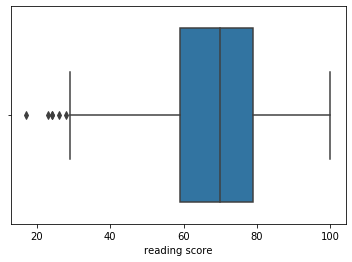

In [13]:
sns.boxplot(x=p1['reading score'])

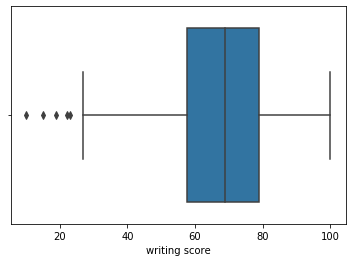

In [14]:
sns.boxplot(x=p1['writing score'])

### Identifying outliers

In [15]:
Q1 = p1.quantile(0.25)
Q3 = p1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

math score       20.00
reading score    20.00
writing score    21.25
dtype: float64


In [16]:
p1[((p1<(Q1-1.5*IQR))|(p1>(Q3+1.5*IQR))).any(axis=1)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
145,female,group C,some college,free/reduced,none,22,39,33
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
596,male,group B,high school,free/reduced,none,30,24,15
787,female,group B,some college,standard,none,19,38,32


In the above table we can see the outlier points of the Dataset

### Dropping outliers

In [17]:
p1= p1[~((p1<(Q1-1.5*IQR))|(p1>(Q3+1.5*IQR))).any(axis=1)]

In [18]:
p1.shape

(988, 8)

Shape of the Dataset after removing outliers 

In [19]:
p1.reset_index()

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
983,995,female,group E,master's degree,standard,completed,88,99,95
984,996,male,group C,high school,free/reduced,none,62,55,55
985,997,female,group C,high school,free/reduced,completed,59,71,65
986,998,female,group D,some college,standard,completed,68,78,77


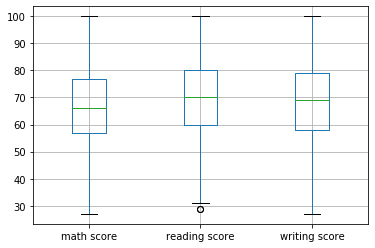

In [20]:
p1.boxplot()

Here we can see there are no outliers in Dataset

## Analyzing relationships between variables. 

### Categorical variables.

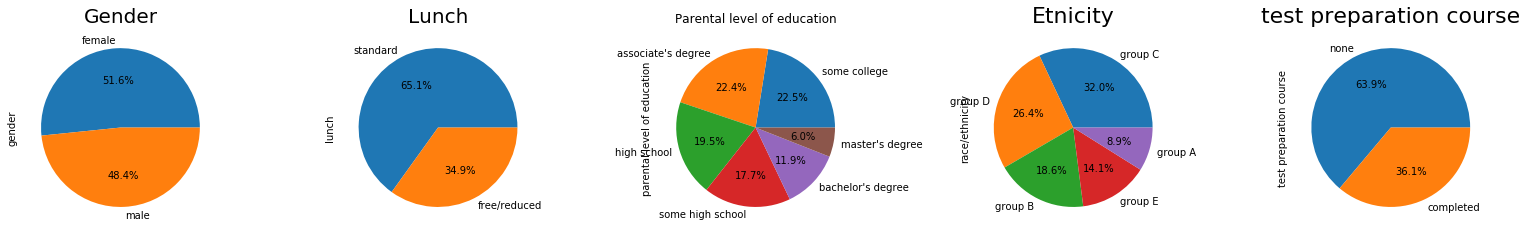

In [21]:
plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0.120,bottom=0.2,right=0.8,top=0.8,wspace=0.6,hspace=0.3)

plt.subplot(151)
plt.title('Gender',fontsize=20)
p1['gender'].value_counts().plot.pie(autopct="%1.1f%%")


plt.subplot(152)
plt.title('Lunch',fontsize=20)
p1['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(153)
plt.title('Parental level of education')
p1['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(154)
plt.title('Etnicity',fontsize=22)
p1['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(155)
plt.title('test preparation course',fontsize=22)
p1['test preparation course'].value_counts().plot.pie(autopct="%1.1f%%")

plt.show()

### Numerical variables

#### Count analysis

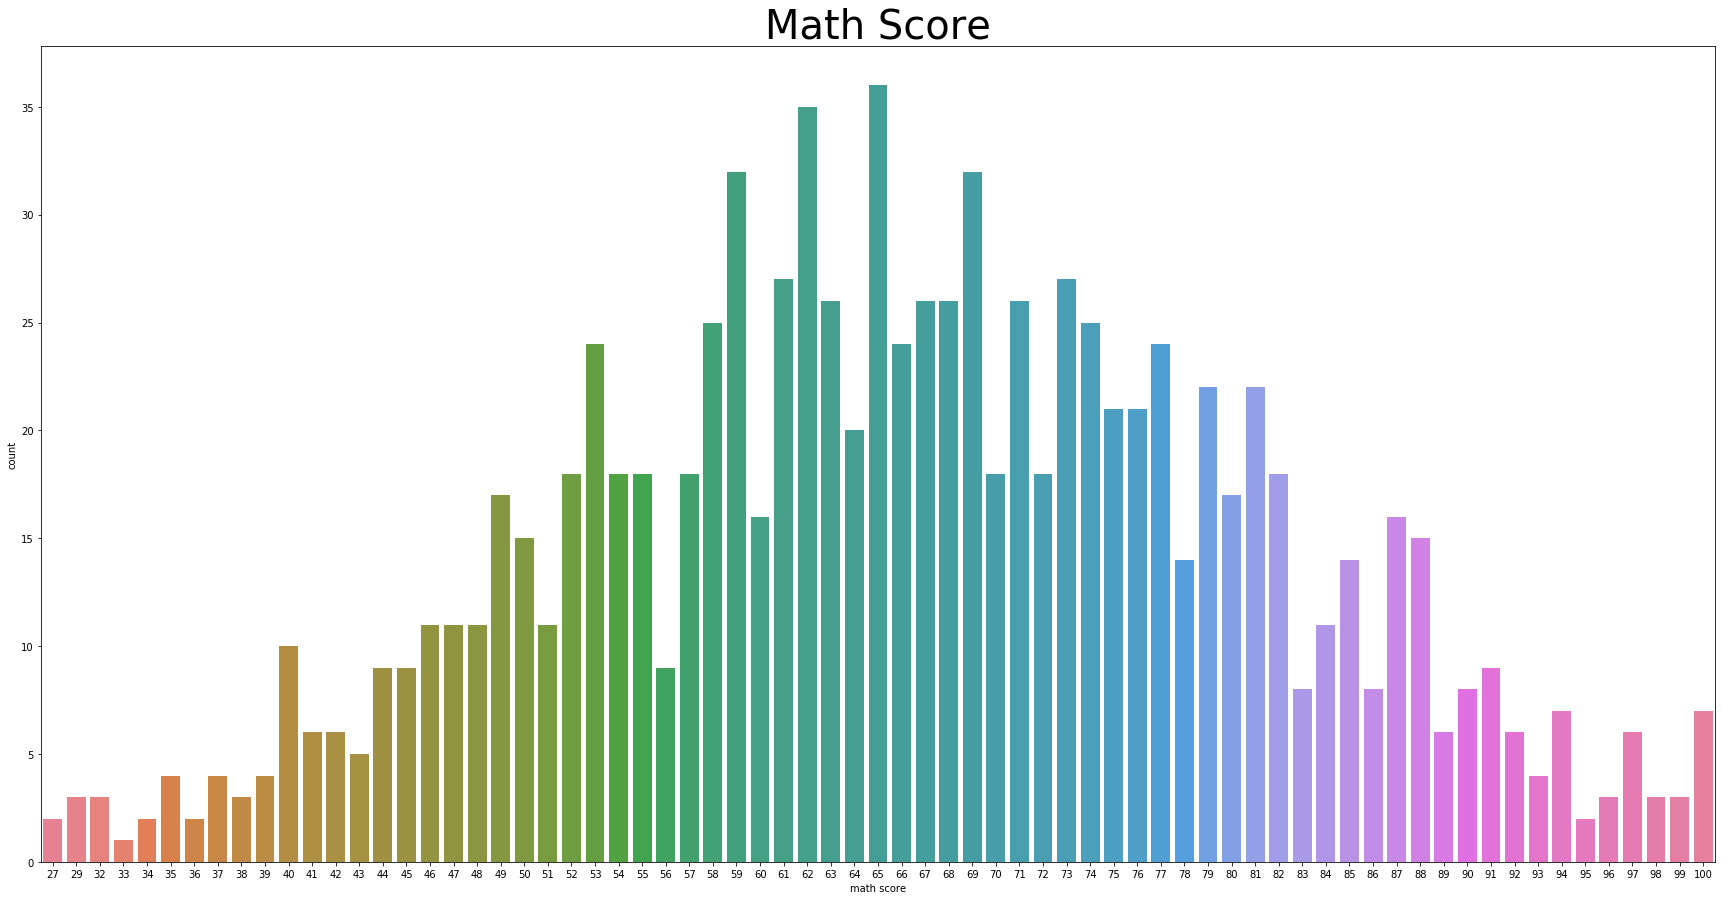

In [22]:
plt.rcParams['figure.figsize']=(30,15)
sns.countplot(p1['math score'],palette='husl')
plt.title('Math Score',fontsize=40)
plt.show()

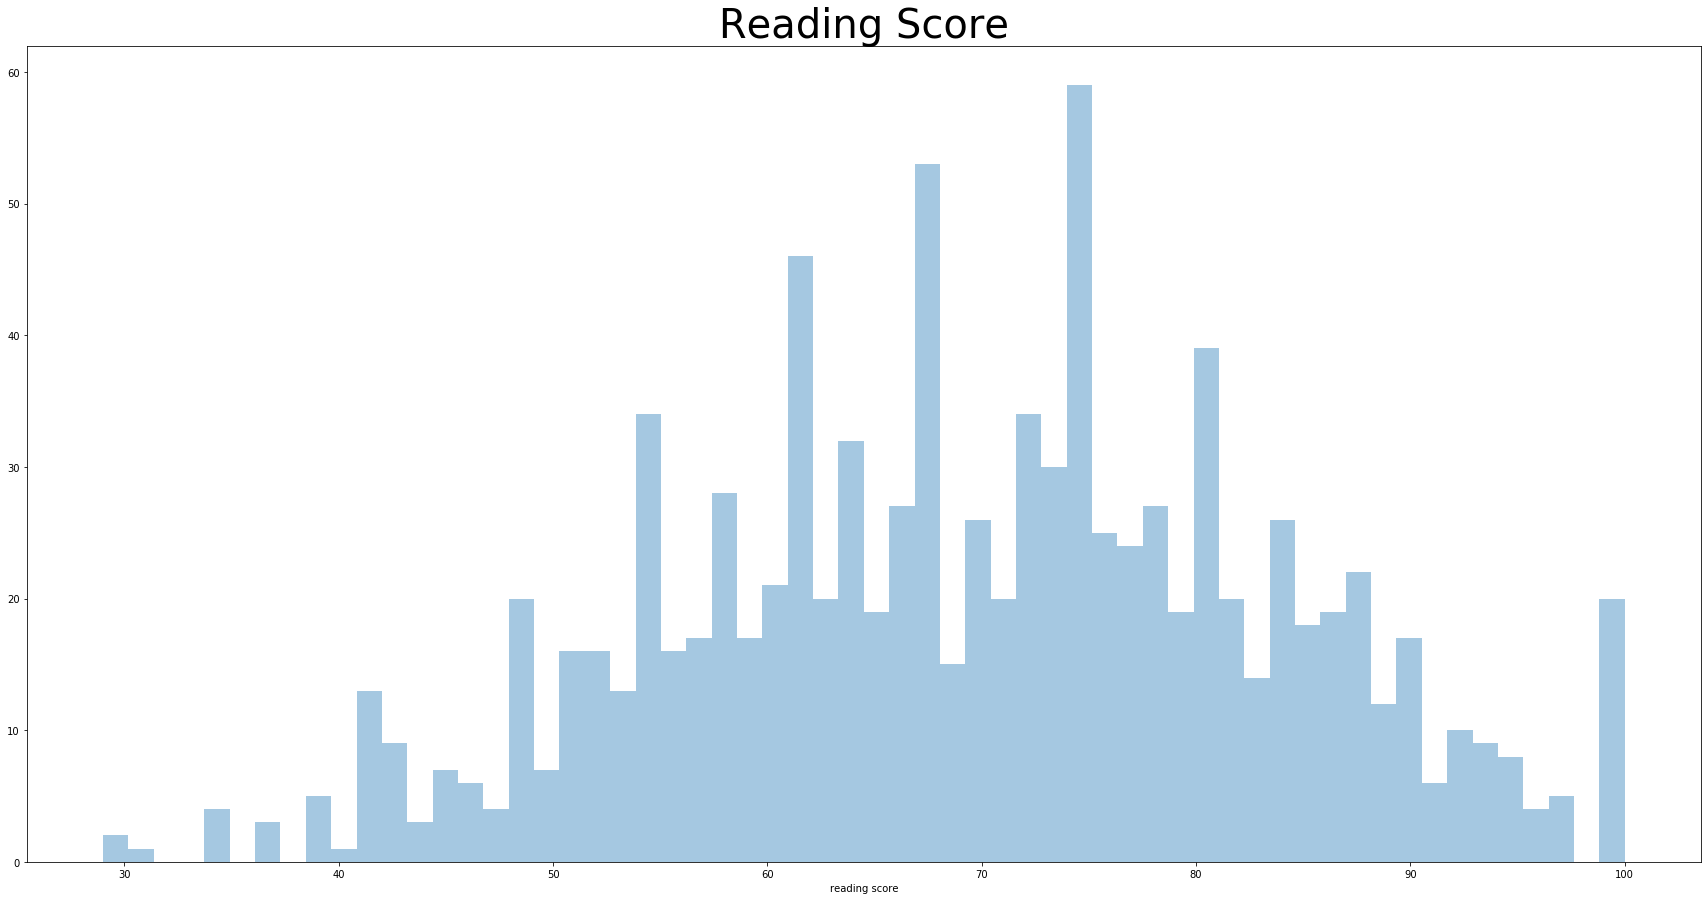

In [23]:
plt.rcParams['figure.figsize']=(30,15)
sns.distplot(p1['reading score'],kde=False,norm_hist=False,bins=60)
plt.title('Reading Score',fontsize=40)
plt.show()

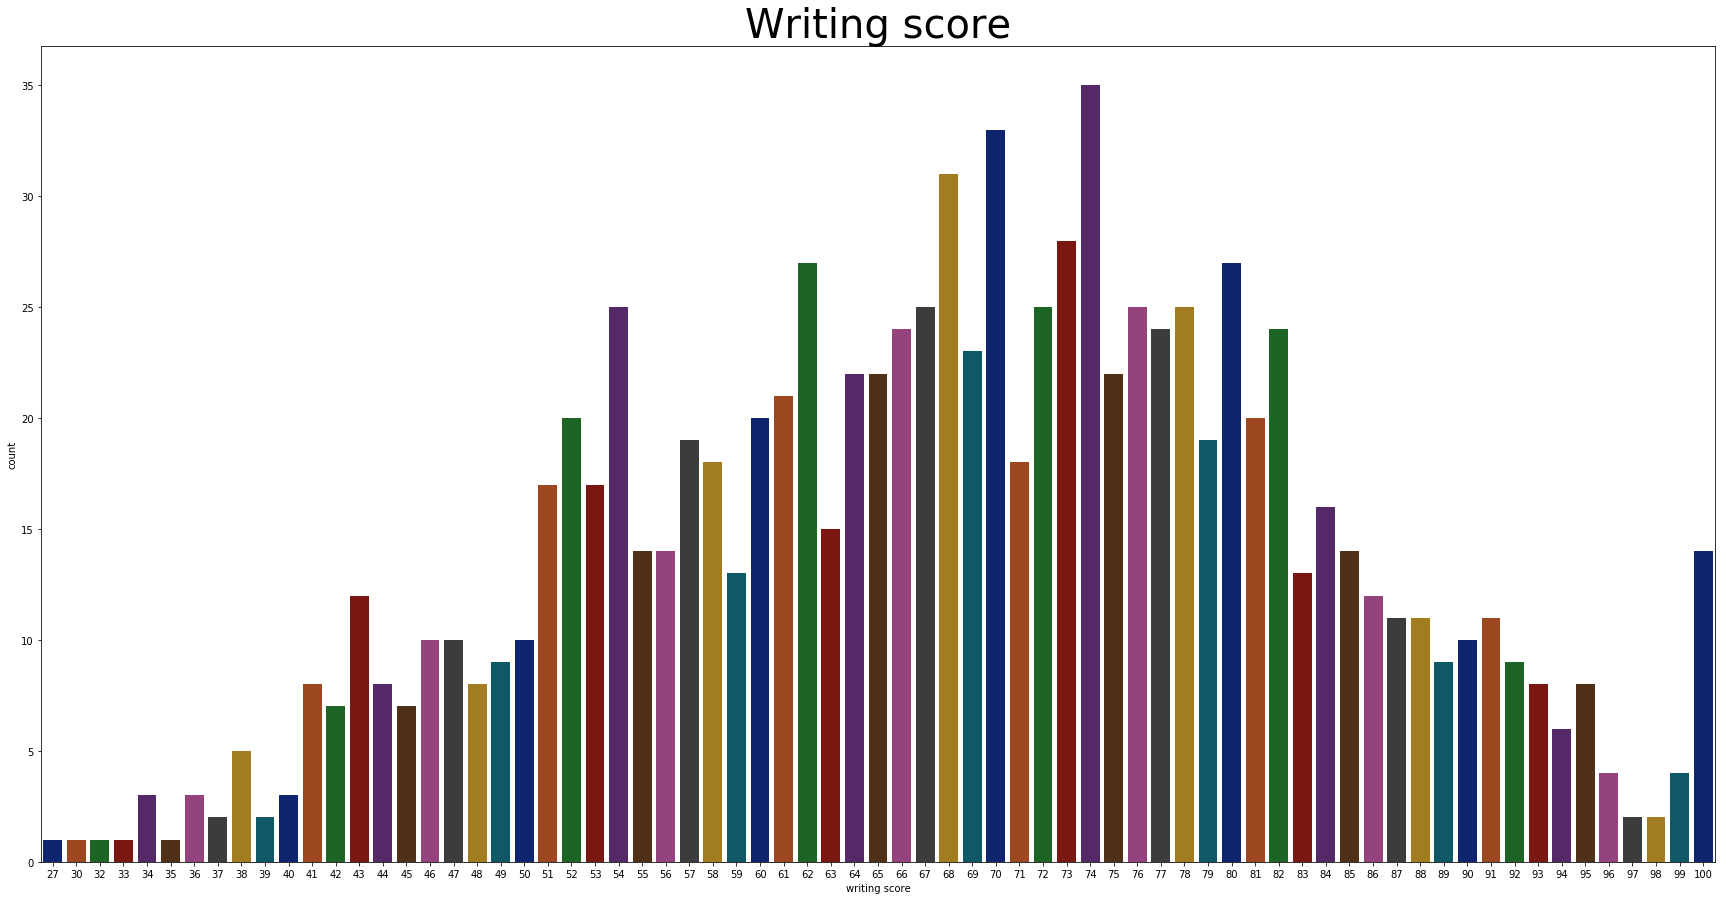

In [24]:
plt.rcParams['figure.figsize']=(30,15)
sns.countplot(p1['writing score'],palette='dark')
plt.title('Writing score',fontsize=40)
plt.show()

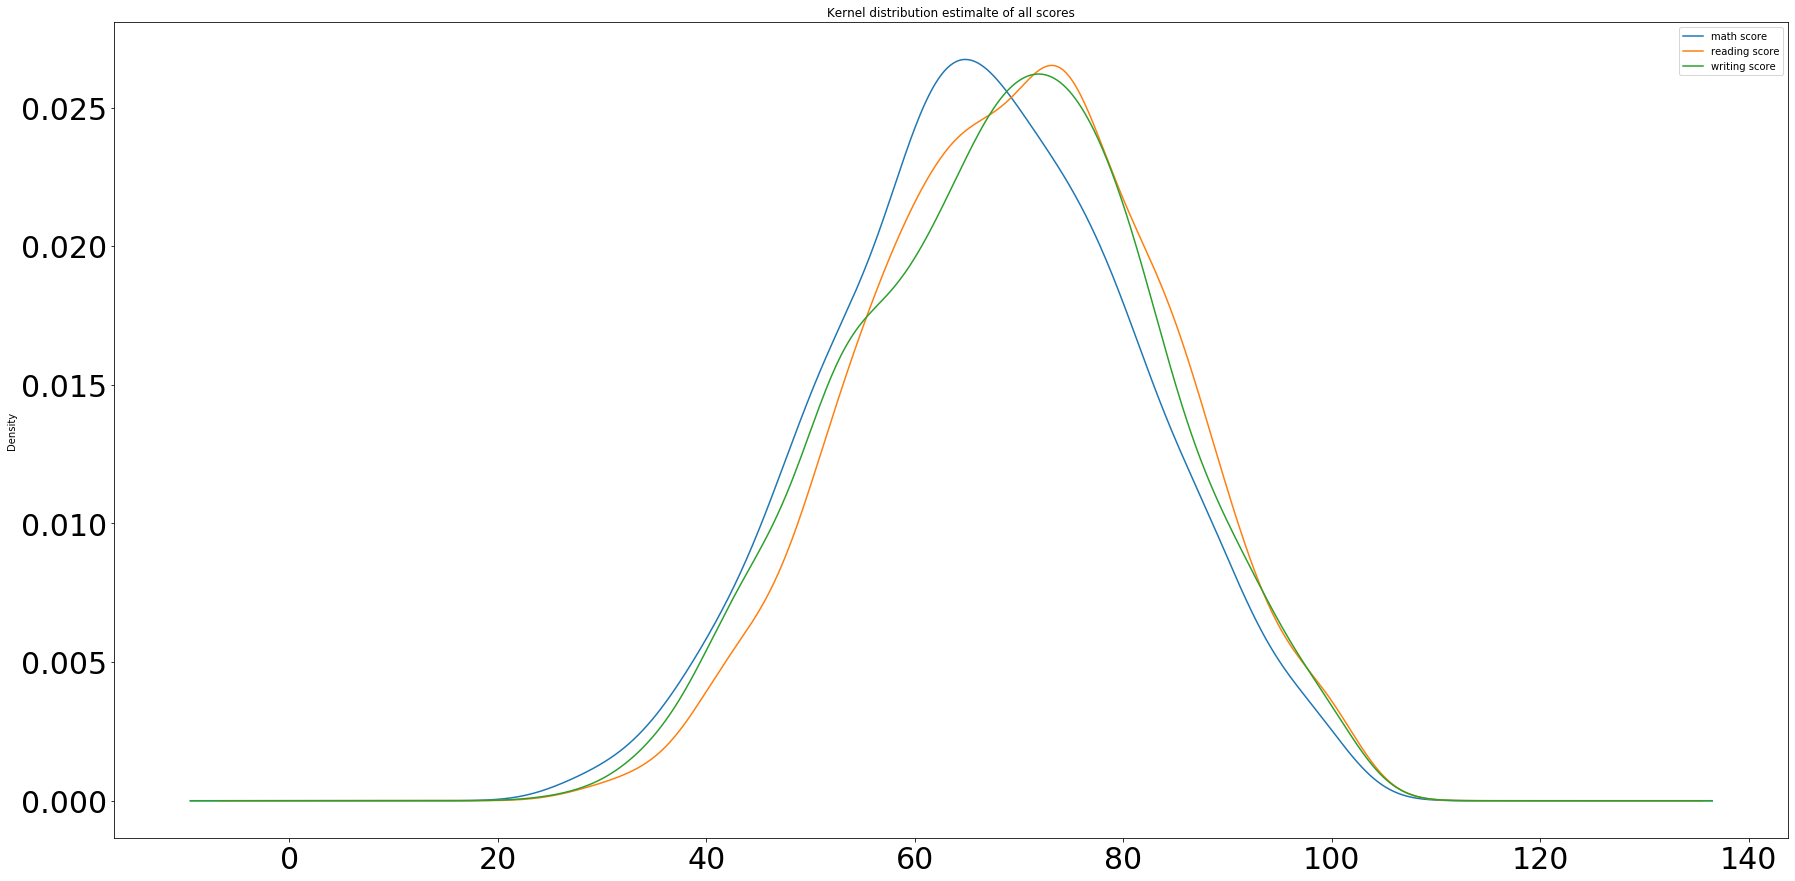

In [25]:
p1.plot(kind='kde',title='Kernel distribution estimalte of all scores',fontsize=30)

From the above graphs,we can see that the maximum number of students have scored 60-80 in all the subjects.

#### Bivariate analysis.

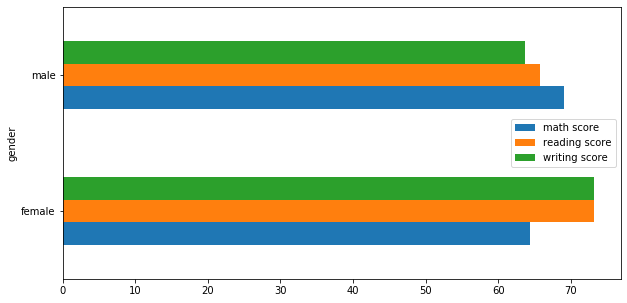

In [26]:
plt.rcParams['figure.figsize']=(10,5)
p1.groupby('gender').mean().plot(kind='barh')

From the graph, we can observe girl students are good at writing and reading whereas boys are good at math.

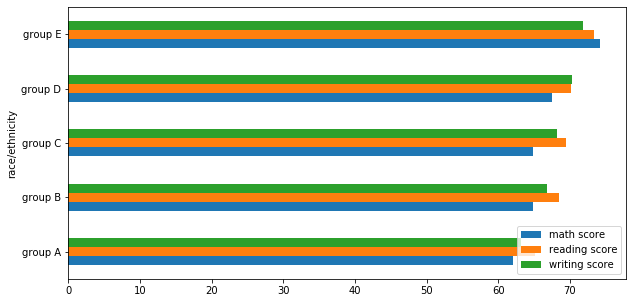

In [27]:
p1.groupby('race/ethnicity').mean().plot(kind='barh')

From the graph, we can observe group E followed by group D scored high marks.

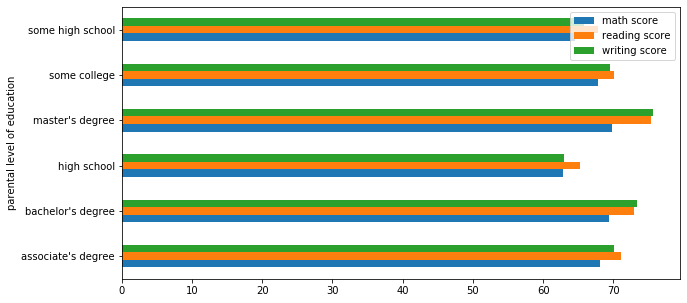

In [28]:
p1.groupby('parental level of education').mean().plot(kind='barh')

From the graph, we can observe students with parental level of education more than some college have scored better marks than rest.

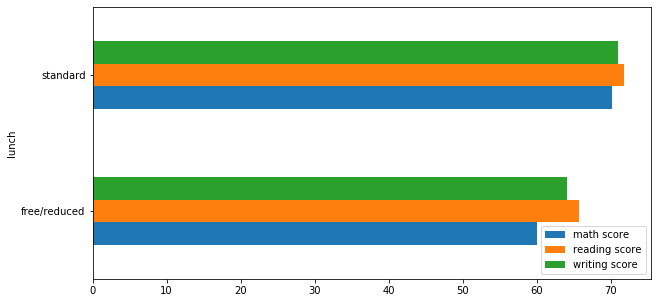

In [29]:
p1.groupby('lunch').mean().plot(kind='barh')

From the graph, we can observe students having standard lunch have scored good marks in all subjects.

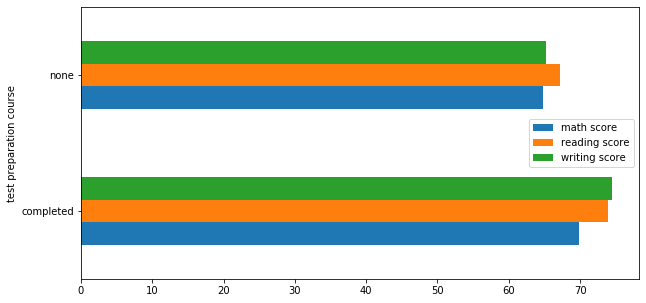

In [30]:
p1.groupby('test preparation course').mean().plot(kind='barh')

From the graph, we can observe completion of test preparation course helped students to get higher marks.

#### Multivariate analysis.

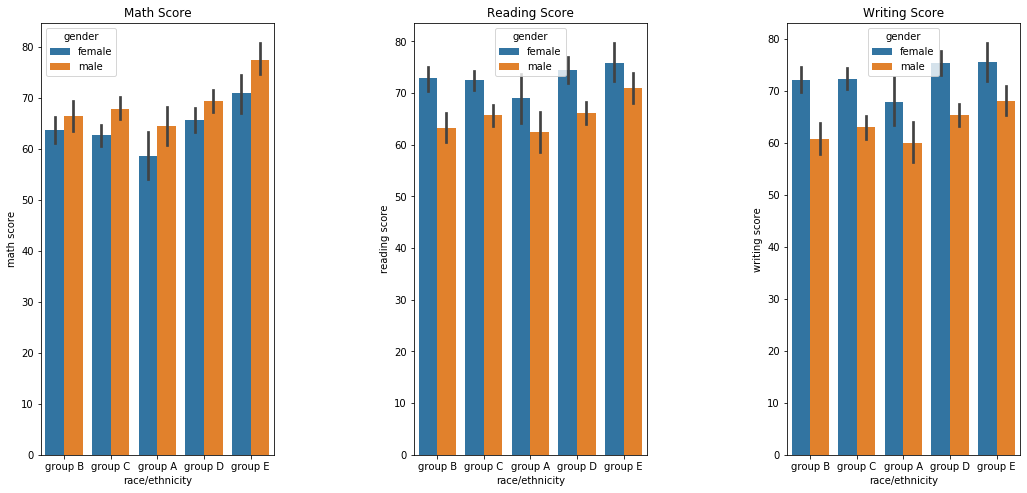

In [31]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.120,bottom=0.2,right=0.8,top=0.8,wspace=0.6,hspace=0.3)

plt.subplot(131)
plt.title('Math Score')
sns.barplot(x="race/ethnicity",y="math score",hue="gender",data=p1)
plt.subplot(132)
plt.title('Reading Score')
sns.barplot(x="race/ethnicity",y="reading score",hue="gender",data=p1)
plt.subplot(133)
plt.title('Writing Score')
sns.barplot(x="race/ethnicity",y="writing score",hue="gender",data=p1)
plt.show()

From the 1st graph, we can observe male students of every group scores best and overall group E,D have scored high marks.

From the 2nd graph, we can observe female students of every group scores best and overall group E,D have scored high marks.

From the 3rd graph, we can observe female students of every group scores best and overall group E,D have scored high marks.

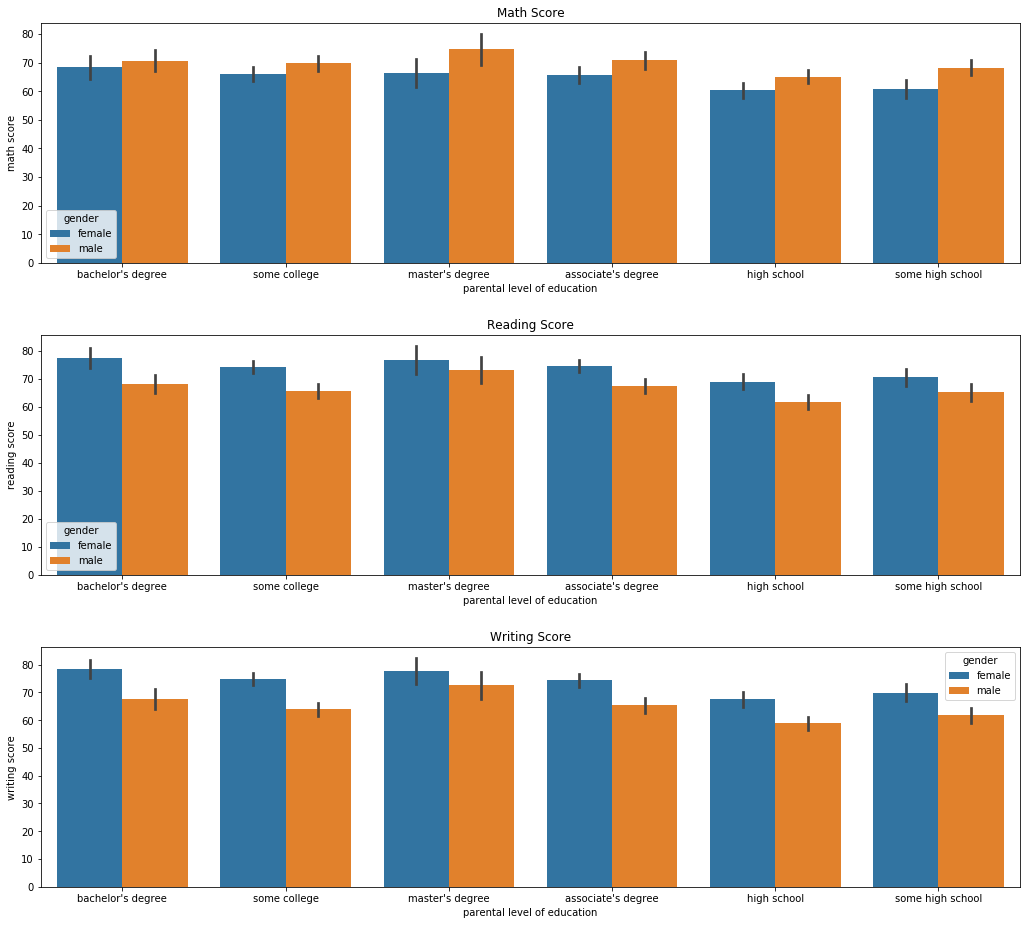

In [32]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.120,bottom=0.8,right=0.8,top=2,wspace=0.6,hspace=0.3)

plt.subplot(311)
plt.title('Math Score')
sns.barplot(x="parental level of education",y="math score",hue="gender",data=p1)
plt.subplot(312)
plt.title('Reading Score')
sns.barplot(x="parental level of education",y="reading score",hue="gender",data=p1)
plt.subplot(313)
plt.title('Writing Score')
sns.barplot(x="parental level of education",y="writing score",hue="gender",data=p1)
plt.show()

From the 1st graph, we can observe male students of every group scores best and parental education with masters and high school  have scored high marks.

From the 2nd graph, we can observe female students of every group scores best and parental education with masters and bachelors degree  have scored high marks.

From the 2nd graph, we can observe female students of every group scores best and parental education with bachelors and masters degree  have scored high marks.

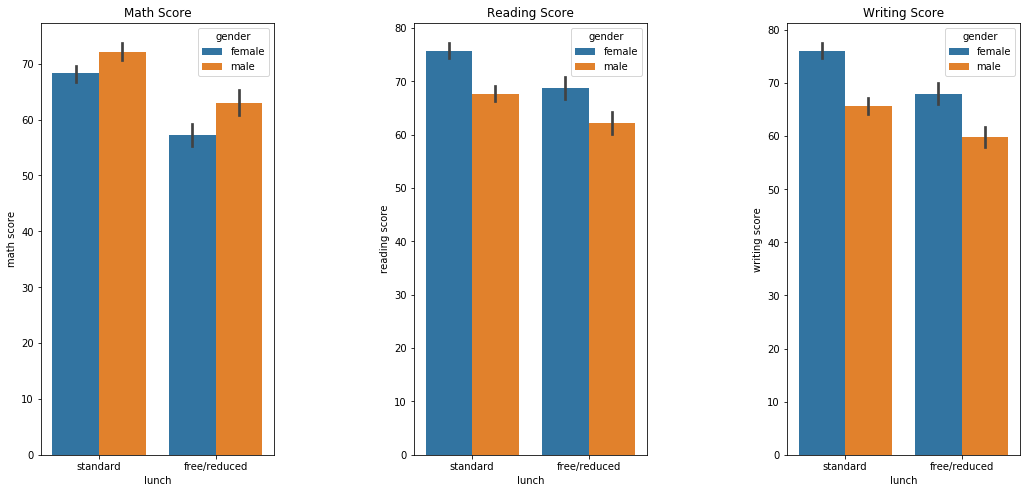

In [33]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.120,bottom=0.2,right=0.8,top=0.8,wspace=0.6,hspace=0.3)

plt.subplot(131)
plt.title('Math Score')
sns.barplot(x="lunch",y="math score",hue="gender",data=p1)
plt.subplot(132)
plt.title('Reading Score')
sns.barplot(x="lunch",y="reading score",hue="gender",data=p1)
plt.subplot(133)
plt.title('Writing Score')
sns.barplot(x="lunch",y="writing score",hue="gender",data=p1)
plt.show()

From 1st graph, we observe male students score high and overall students having standard lunch scored high.

From 2nd and 3rd graphs, we observe female students score high and overall students having standard lunch scored high.

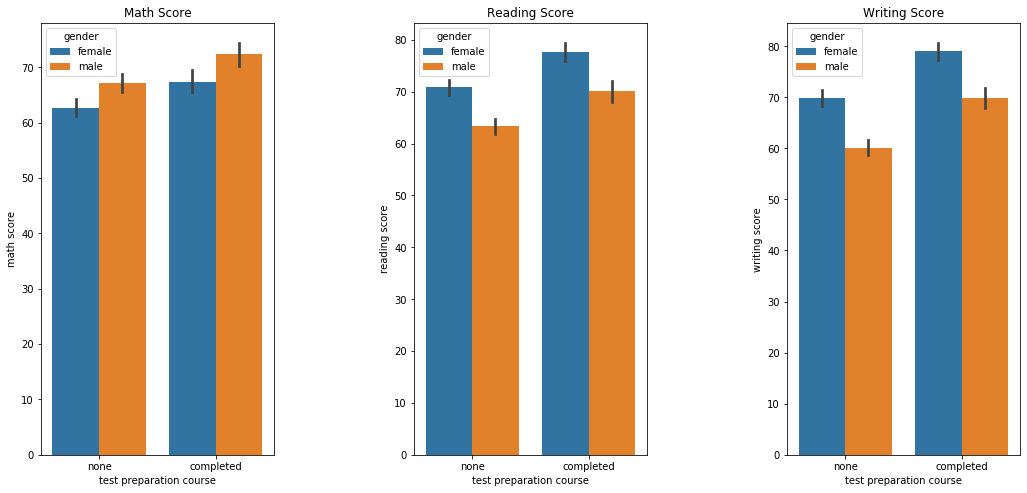

In [34]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.120,bottom=0.2,right=0.8,top=0.8,wspace=0.6,hspace=0.3)

plt.subplot(131)
plt.title('Math Score')
sns.barplot(x="test preparation course",y="math score",hue="gender",data=p1)
plt.subplot(132)
plt.title('Reading Score')
sns.barplot(x="test preparation course",y="reading score",hue="gender",data=p1)
plt.subplot(133)
plt.title('Writing Score')
sns.barplot(x="test preparation course",y="writing score",hue="gender",data=p1)
plt.show()

From 1st graph, we observe male students score high and overall students who completed the course scored high.

From 2nd and 3rd graph, we observe female students score high and overall students having standard lunch scored high.

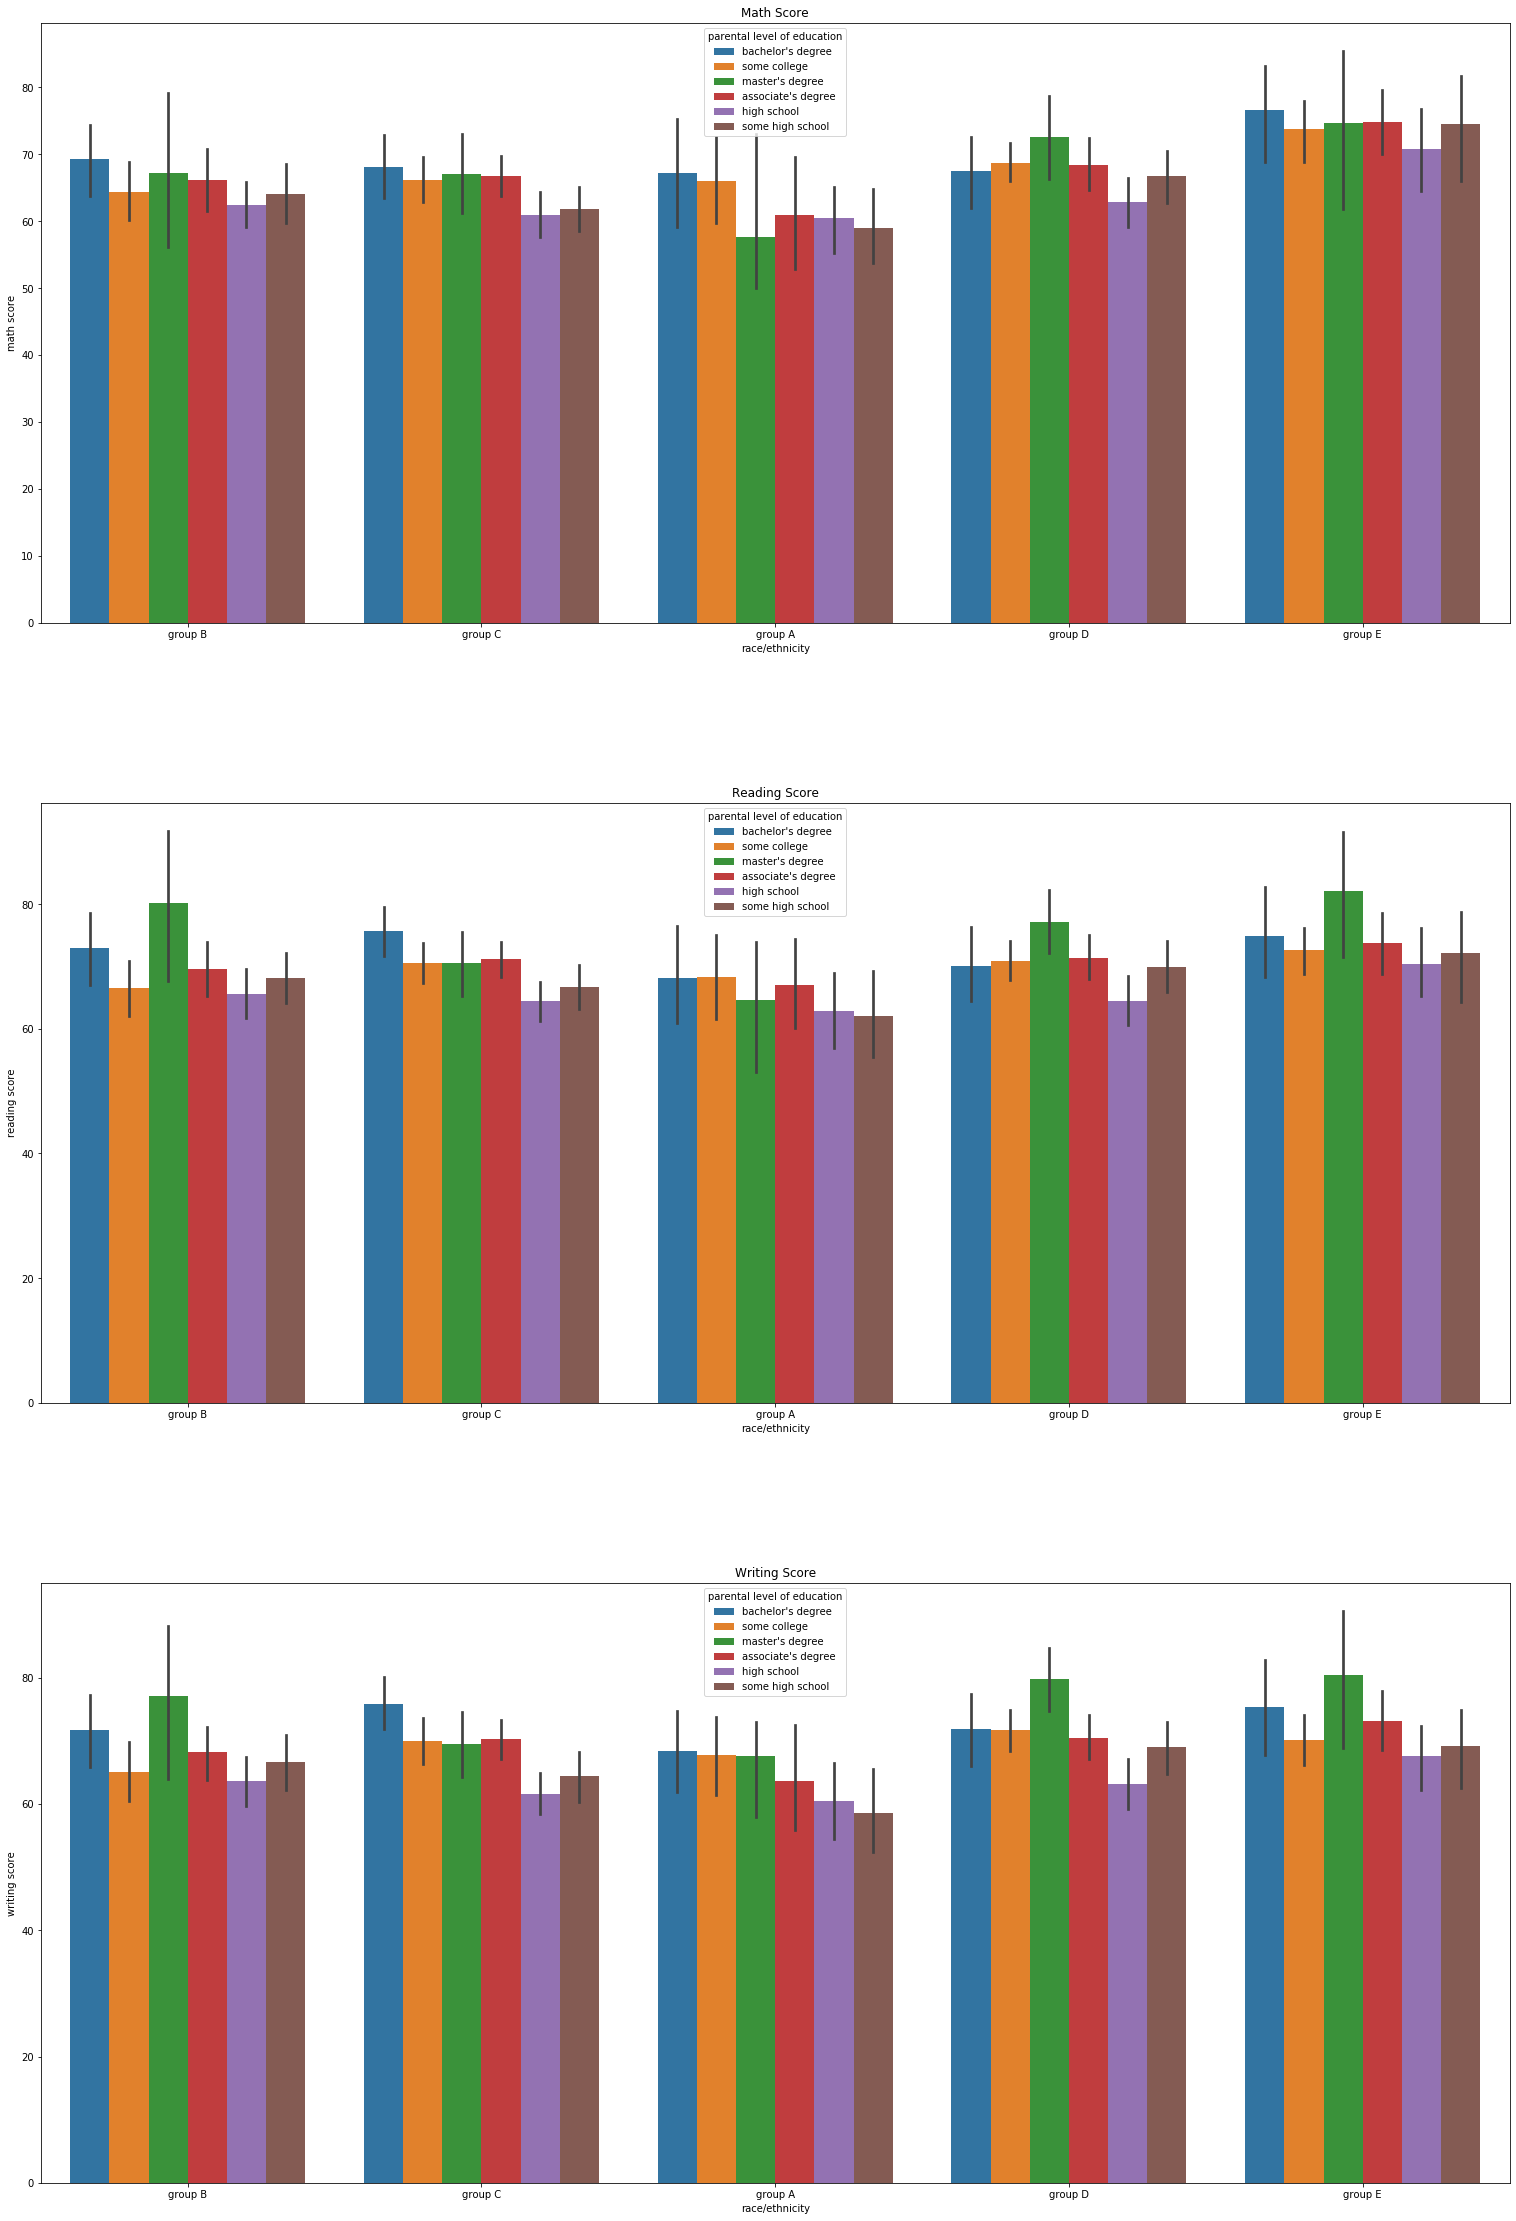

In [35]:
plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.120,bottom=0.2,right=0.8,top=0.8,wspace=0.6,hspace=0.3)

plt.subplot(311)
plt.title('Math Score')
sns.barplot(x="race/ethnicity",y="math score",hue="parental level of education",data=p1)
plt.subplot(312)
plt.title('Reading Score')
sns.barplot(x="race/ethnicity",y="reading score",hue="parental level of education",data=p1)
plt.subplot(313)
plt.title('Writing Score')
sns.barplot(x="race/ethnicity",y="writing score",hue="parental level of education",data=p1)
plt.show()

From 1st graph, we observe students of group E,d  and students with parental education master's and bachalor's degree scored high.

From 2nd graph, we observe students of group E,C and students with parental education master's and bachalor's degree scored high.

From 3rd graph, we observe students of group E,d  and students with parental education master's and bachalor's degree scored high.

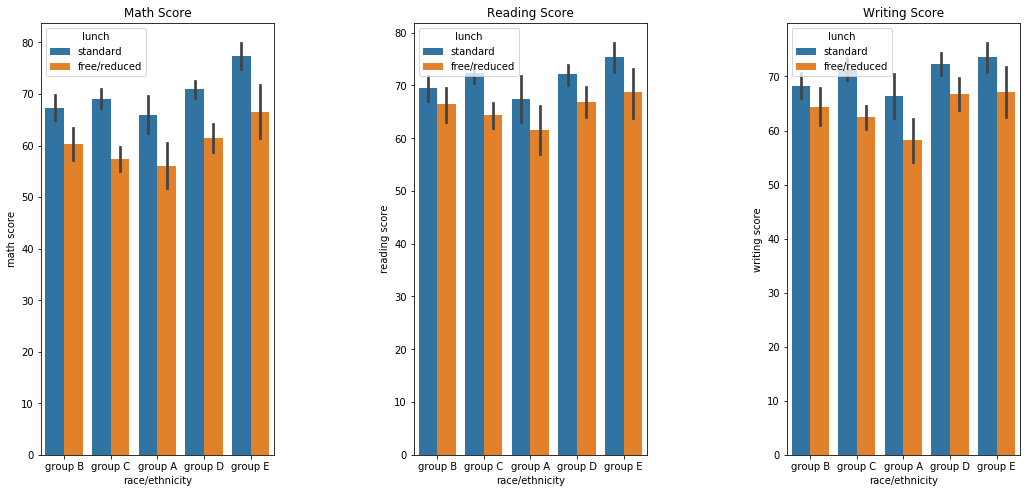

In [36]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.120,bottom=0.2,right=0.8,top=0.8,wspace=0.6,hspace=0.3)

plt.subplot(131)
plt.title('Math Score')
sns.barplot(x="race/ethnicity",y="math score",hue="lunch",data=p1)
plt.subplot(132)
plt.title('Reading Score')
sns.barplot(x="race/ethnicity",y="reading score",hue="lunch",data=p1)
plt.subplot(133)
plt.title('Writing Score')
sns.barplot(x="race/ethnicity",y="writing score",hue="lunch",data=p1)
plt.show()

From 1st graph, we observe male students scored high and on overall students of group D,E scored high.

From 2nd graph, we observe female students scored high and on overall students of group E,D scored high.

From 3rd graph, we observe female students scored high and on overall students of group E,c scored high.

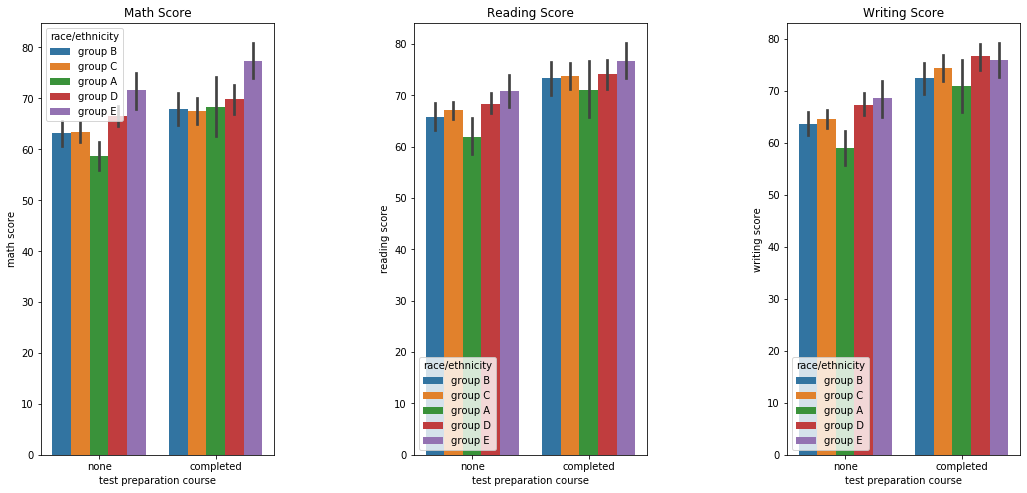

In [37]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.120,bottom=0.2,right=0.8,top=0.8,wspace=0.6,hspace=0.3)

plt.subplot(131)
plt.title('Math Score')
sns.barplot(x="test preparation course",y="math score",hue="race/ethnicity",data=p1)
plt.subplot(132)
plt.title('Reading Score')
sns.barplot(x="test preparation course",y="reading score",hue="race/ethnicity",data=p1)
plt.subplot(133)
plt.title('Writing Score')
sns.barplot(x="test preparation course",y="writing score",hue="race/ethnicity",data=p1)
plt.show()

From all the 3 graphs, we observe students who completed test preparation course scored high and on overall students of group E scored high.

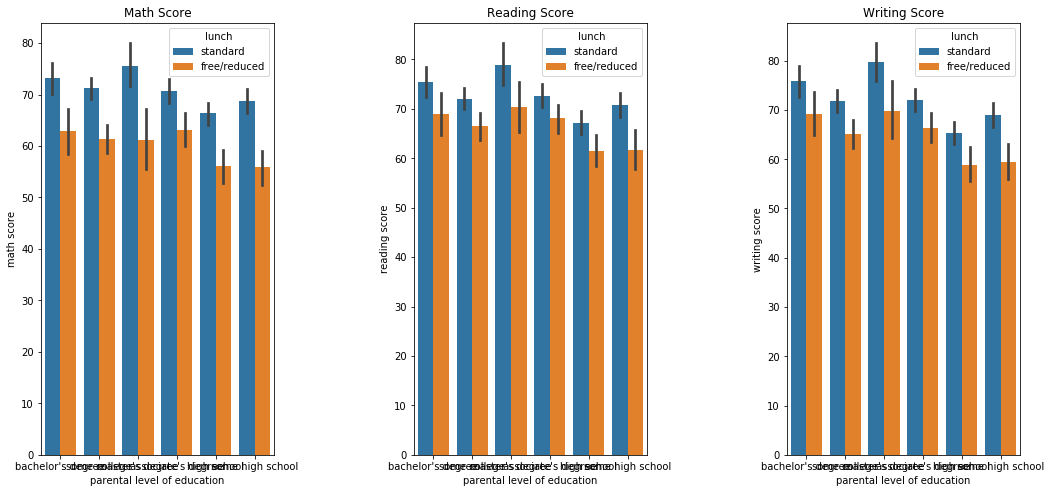

In [38]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.120,bottom=0.2,right=0.8,top=0.8,wspace=0.6,hspace=0.3)

plt.subplot(131)
plt.title('Math Score')
sns.barplot(x="parental level of education",y="math score",hue="lunch",data=p1)
plt.subplot(132)
plt.title('Reading Score')
sns.barplot(x="parental level of education",y="reading score",hue="lunch",data=p1)
plt.subplot(133)
plt.title('Writing Score')
sns.barplot(x="parental level of education",y="writing score",hue="lunch",data=p1)
plt.show()

From all the 3 graphs, we observe students having standard lunch scored high and with parental level of master's degree scored high.

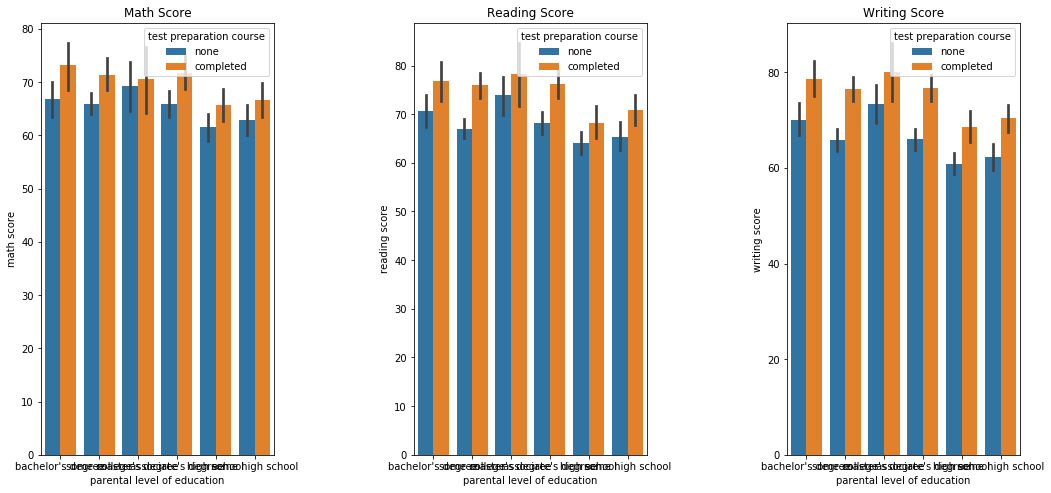

In [39]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.120,bottom=0.2,right=0.8,top=0.8,wspace=0.6,hspace=0.3)

plt.subplot(131)
plt.title('Math Score')
sns.barplot(x="parental level of education",y="math score",hue="test preparation course",data=p1)
plt.subplot(132)
plt.title('Reading Score')
sns.barplot(x="parental level of education",y="reading score",hue="test preparation course",data=p1)
plt.subplot(133)
plt.title('Writing Score')
sns.barplot(x="parental level of education",y="writing score",hue="test preparation course",data=p1)
plt.show()

From 1st graph,we observe students who have completed test preparation course scored high and parental education of bachelor's   degree got high scores

From 2nd,3rd graphs,we observe students who have completed test preparation course scored high and parental education of master's degree got high scores

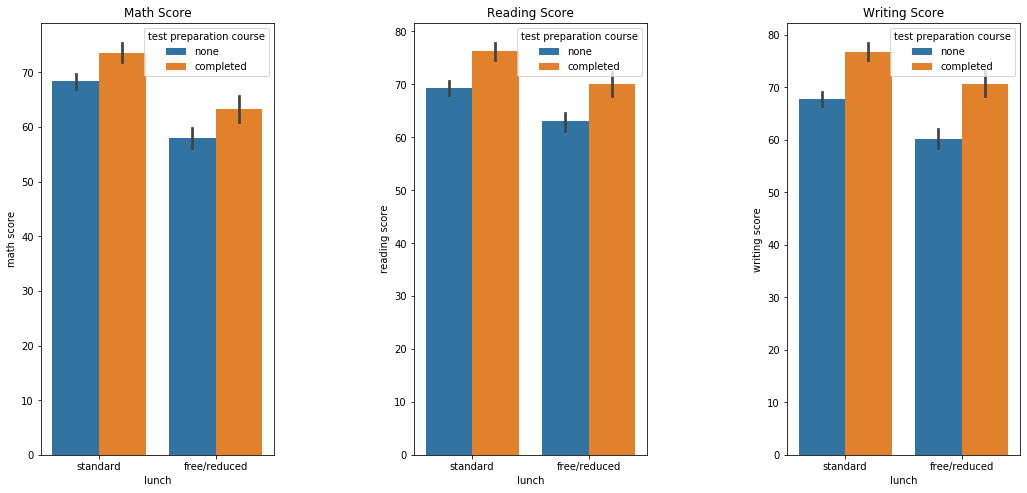

In [40]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.120,bottom=0.2,right=0.8,top=0.8,wspace=0.6,hspace=0.3)

plt.subplot(131)
plt.title('Math Score')
sns.barplot(x="lunch",y="math score",hue="test preparation course",data=p1)
plt.subplot(132)
plt.title('Reading Score')
sns.barplot(x="lunch",y="reading score",hue="test preparation course",data=p1)
plt.subplot(133)
plt.title('Writing Score')
sns.barplot(x="lunch",y="writing score",hue="test preparation course",data=p1)
plt.show()

From all the 3 graphs, we observe students having standard lunch scored high and students who have completed test preparation course scored high.

### Grading students on marks

In [41]:
p1['total marks']=p1['math score']+p1['reading score']+p1['writing score']

In [42]:
p1['per']=p1['total marks']/300*100

#### Classification of marks into grades

In [43]:
def grade(score):
    if score>=90 and score<=100:
        return '10'
    elif score>=80 and score<90:
        return '9'
    elif score>=70 and score<80:
        return '8'
    elif score>=60 and score<70:
        return '7'
    elif score>=50 and score<60:
        return '6'
    else:
        return '0'
    
    

In [44]:
p1['grade']=p1['per'].apply(grade)

In [45]:
p1.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none   

In [46]:
p1.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
total marks                      int64
per                            float64
grade                           object
dtype: object

In [47]:
p1['grade']=p1['grade'].astype(int)

In [48]:
p1.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
total marks                      int64
per                            float64
grade                            int32
dtype: object

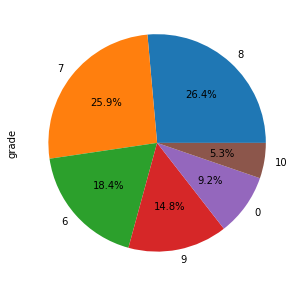

In [49]:
p1['grade'].value_counts().plot.pie(autopct="%1.1f%%")

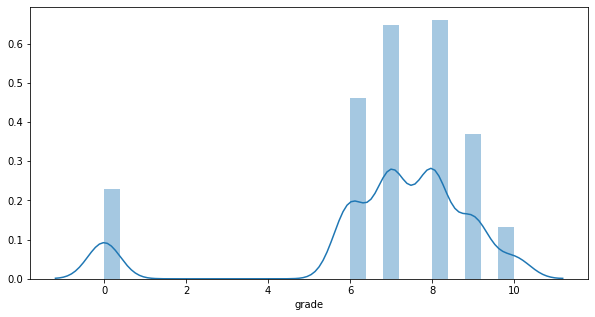

In [50]:
sns.distplot(p1['grade'])

From the above charts,we conclude most students scored 8,7 GPA and 9.2% failed students.

### Analyzing the data in forms of grades

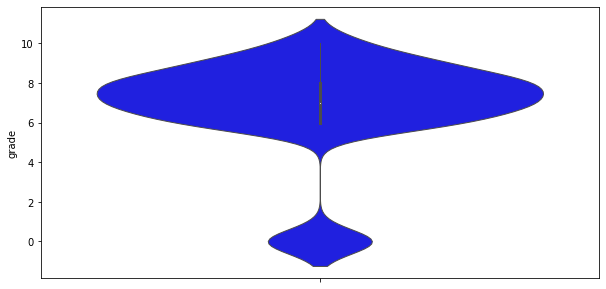

In [51]:
sns.violinplot(y='grade',data=p1,color='b',linewidth=1)

The voilin graph shows distribution pattern of student grades.

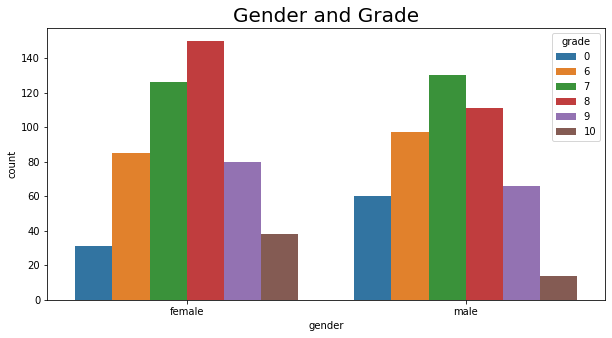

In [52]:
plt.title('Gender and Grade',fontsize=20)
sns.countplot(x='gender',hue='grade',data=p1)
plt.show()

From the above bar graph we can depict that most female students recieved 8GPA and most male students 7GPA.

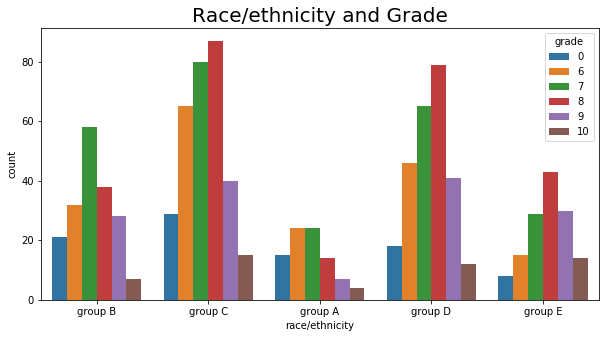

In [53]:
plt.title('Race/ethnicity and Grade',fontsize=20)
sns.countplot(x='race/ethnicity',hue='grade',data=p1)
plt.show()

From the above bar graph we can depict that most highest marks are scored by group C and most failed students are also from group B.

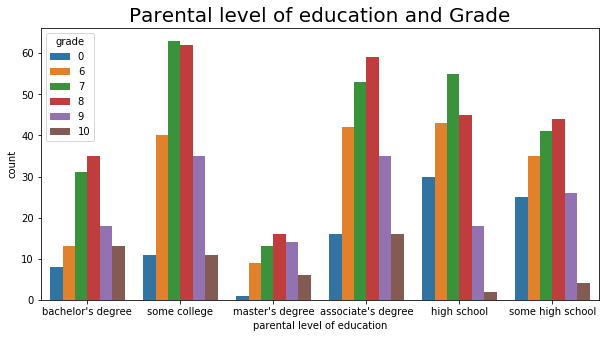

In [54]:
plt.title('Parental level of education and Grade',fontsize=20)
sns.countplot(x='parental level of education',hue='grade',data=p1)
plt.show()

From the above bar graph we can depict that most 8,7 GPA's are scored by students with parental education with some college and associate's degree

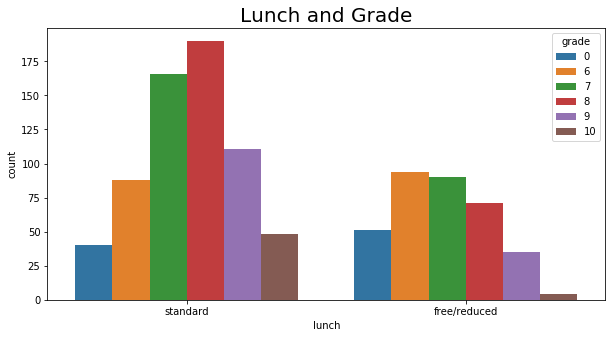

In [55]:
plt.title('Lunch and Grade',fontsize=20)
sns.countplot(x='lunch',hue='grade',data=p1)
plt.show()

From the above bar graph we can depict that most students having standard lunch scored high and most failed students are the one who eats free lunch.

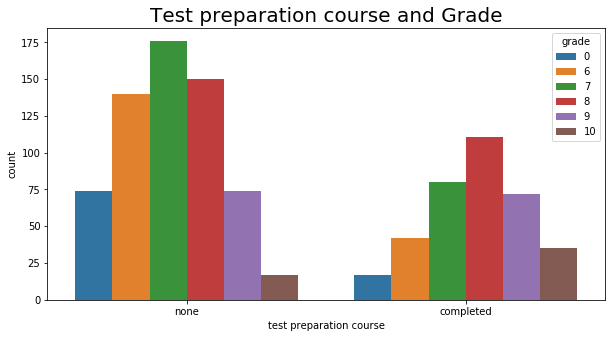

In [56]:
plt.title('Test preparation course and Grade',fontsize=20)
sns.countplot(x='test preparation course',hue='grade',data=p1)
plt.show()

From the above bar graph we can say students without test preparation scored high and many failed too.

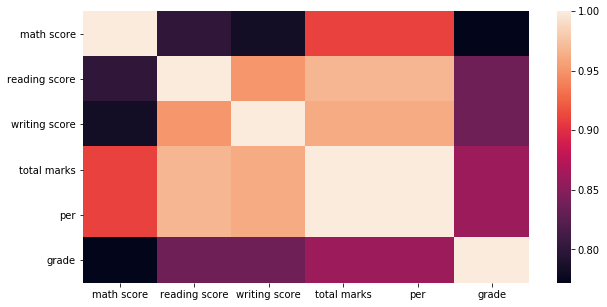

In [57]:
sns.heatmap(p1.corr())

This heat map shows the relations between numerical variables

In [58]:
p1.corr()

,math score,reading score,writing score,total marks,per,grade
math score,1.000000,0.801405,0.783349,0.910340,0.910340,0.772056
reading score,0.801405,1.000000,0.950629,0.968171,0.968171,0.835919
writing score,0.783349,0.950629,1.000000,0.962390,0.962390,0.836047
total marks,0.910340,0.968171,0.962390,1.000000,1.000000,0.860292
per,0.910340,0.968171,0.962390,1.000000,1.000000,0.860292
grade,0.772056,0.835919,0.836047,0.860292,0.860292,1.000000


The above correlation matrix gives numerical relations between numerical variables.

## Conclusion:

### 1. Male students are good at math and weak at reading and writing.

### 2. Students of group E scored highest and followed by D,E in most of the subjects.

### 3. Students who's parents have higher educations influenced them in scoring high marks.

### 4. Students having standard lunch are good at studies.

### 5. students who completed test preparation course scored high marks.